# COVID-19 Detection on X-Ray Images

## 1. Importing the Training & Test Dataset

In [1]:
TRAIN_PATH = r"C:\Users\Aviral\OneDrive\Documents\Covid-19-CNN-DETECTION-master\Train"
VAL_PATH = r"C:\Users\Aviral\OneDrive\Documents\Covid-19-CNN-DETECTION-master\Val"



In [2]:
!pip install keras
!pip install tensorflow

In [3]:
import numpy as np
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## 2. Buiding the CNN Architecture

In [4]:
data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }



In [5]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
# Training from scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1/255,
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
  r"C:\Users\admin\Pictures\OpenBoard\Covid-19-CNN-DETECTION-master\Train\Normal",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


In [9]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

validation_generator = test_dataset.flow_from_directory(
    r'C:\Users\admin\Pictures\OpenBoard\Covid-19-CNN-DETECTION-master\Train\Normal',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

In [11]:
validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [12]:
model.save("model_adv.h5")

In [13]:
model.evaluate_generator(train_generator)

C:\Users\Aviral\AppData\Local\Temp/ipykernel_15708/326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.6901540756225586, 0.5401785969734192]

In [14]:
model.evaluate_generator(validation_generator)

C:\Users\Aviral\AppData\Local\Temp/ipykernel_15708/3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.6925600171089172, 0.4833333194255829]

## 4. Model Evaluation

In [15]:
model = load_model('model_adv.h5')

In [16]:
import os

In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])



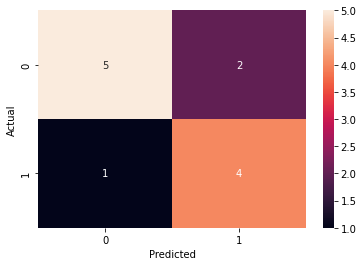

In [19]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

*This Method has not been validated clinically and hence should not be used as it is in any clinical computer aided diagnosis system.*

